c:\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Epoch 1/50
469/469 - 9s - loss: 0.3990 - accuracy: 0.8999 - val_loss: 0.1725 - val_accuracy: 0.9499 - 9s/epoch - 20ms/step
Epoch 2/50
469/469 - 8s - loss: 0.1435 - accuracy: 0.9585 - val_loss: 0.1241 - val_accuracy: 0.9615 - 8s/epoch - 18ms/step
Epoch 3/50
469/469 - 8s - loss: 0.0976 - accuracy: 0.9719 - val_loss: 0.0914 - val_accuracy: 0.9716 - 8s/epoch - 18ms/step
Epoch 4/50
469/469 - 9s - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0855 - val_accuracy: 0.9751 - 9s/epoch - 18ms/step
Epoch 5/50
469/469 - 8s - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0749 - val_accuracy: 0.9752 - 8s/epoch - 18ms/step
Epoch 6/50
469/469 - 8s - loss: 0.0406 - accuracy: 0.9890 - val_loss: 0.0732 - val_accuracy: 0.9771 - 8s/epoch - 18ms/step
Epoch 7/50
469/469 - 8s - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0638 - val_accuracy: 0.9794 - 8s/epoch - 18ms/step
Epoch 8/50
469/469 - 8s - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0685 - val_accuracy: 0.9775 - 8s/epoch - 18ms/step
Epoch 9/50
469/4

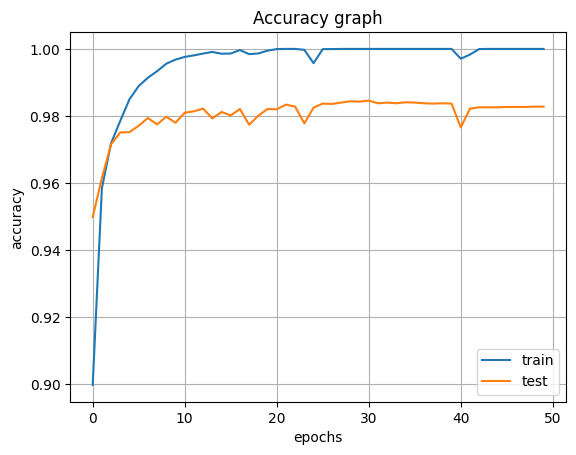

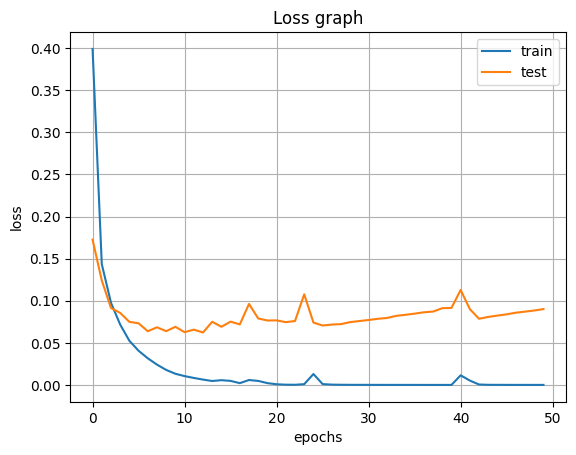

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()